<a href="https://colab.research.google.com/github/zzoobro/tongteuk/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1

- 학과: 응용통계학과
- 이름 : 박주형

## 라이브러리 및 데이터 로드

In [ ]:
install.packages('tidyverse')
library(tidyverse)

In [ ]:
install.packages('nycflights13')
library('nycflights13')

## 데이터 탐색

In [ ]:
str(flights)

In [ ]:
head(flights)

## dplyr 연습

In [ ]:
# UA 항공사만 필터링

flights %>% filter( carrier=='UA' )

In [ ]:
# 필요한 column만 선택

flights %>% select(origin, dest, carrier, year, month, day, dep_time, distance, air_time, dep_delay, arr_delay)

In [ ]:
# 비행 시간순으로 정렬

flights %>%
  select(origin, dest, carrier, year, month, day, dep_time, distance, air_time, dep_delay, arr_delay) %>%
  filter( carrier=='UA' ) %>%
  arrange(air_time)

In [ ]:
# 이륙과 착륙의 예정시간 오차의 합을 delay 변수로 정의
# delay 변수의 내림차순으로 정렬

flights %>%
  select(origin, dest, carrier, year, month, day, dep_time, distance, air_time, dep_delay, arr_delay) %>%
  mutate(delay = abs(dep_delay) + abs(arr_delay)) %>%
  arrange(desc(delay))

In [24]:
# 항공사별로 group_by 적용
# 항공사별 delay 시간의 평균

flights %>%
  select(origin, dest, carrier, year, month, day, dep_time, distance, air_time, dep_delay, arr_delay) %>%
  mutate(delay = abs(dep_delay) + abs(arr_delay)) %>%
  group_by(carrier) %>%
  summarise(delay_mean = mean(delay, na.rm=TRUE))

,carrier,delay_mean
,<chr>,<dbl>
1,9E,53.12895
2,AA,40.22293
3,AS,42.39915
4,B6,43.93097
5,DL,38.92167
6,EV,55.74305
7,F9,57.76946
8,FL,52.48000
9,HA,39.97953


## ggplot 연습

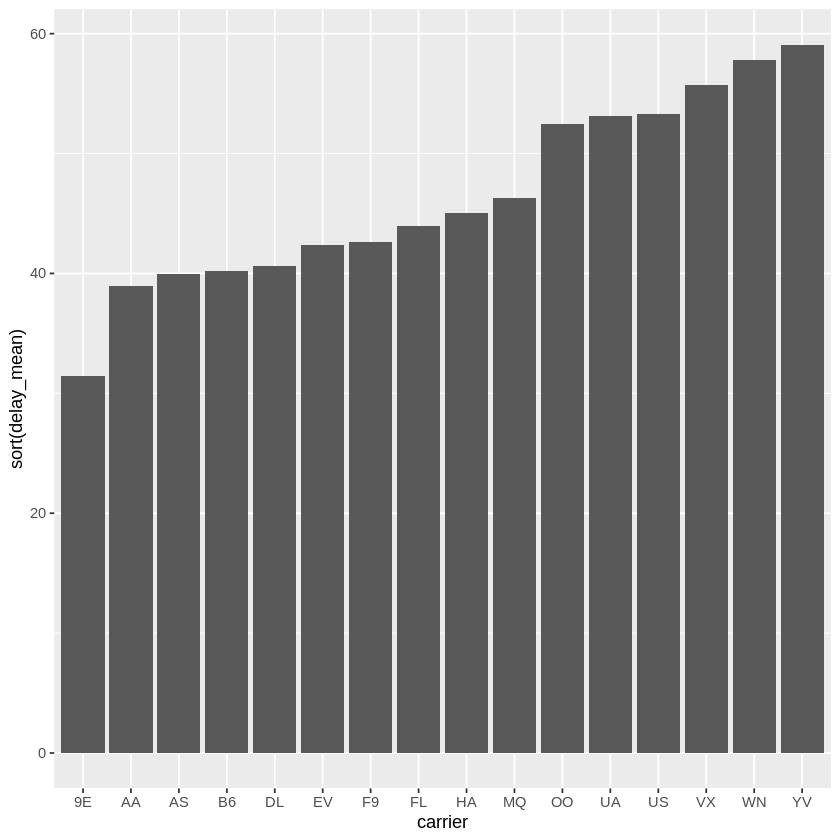

In [32]:
# 항공사별 delay_mean 비교 플랏

flights %>%
  select(origin, dest, carrier, year, month, day, dep_time, distance, air_time, dep_delay, arr_delay) %>%
  mutate(delay = abs(dep_delay) + abs(arr_delay)) %>%
  group_by(carrier) %>%
  summarise(delay_mean = mean(delay, na.rm=TRUE)) %>%

ggplot(aes(carrier, sort(delay_mean))) + geom_bar(stat='identity')

Warning message:
“Removed 9430 rows containing missing values (geom_point).”


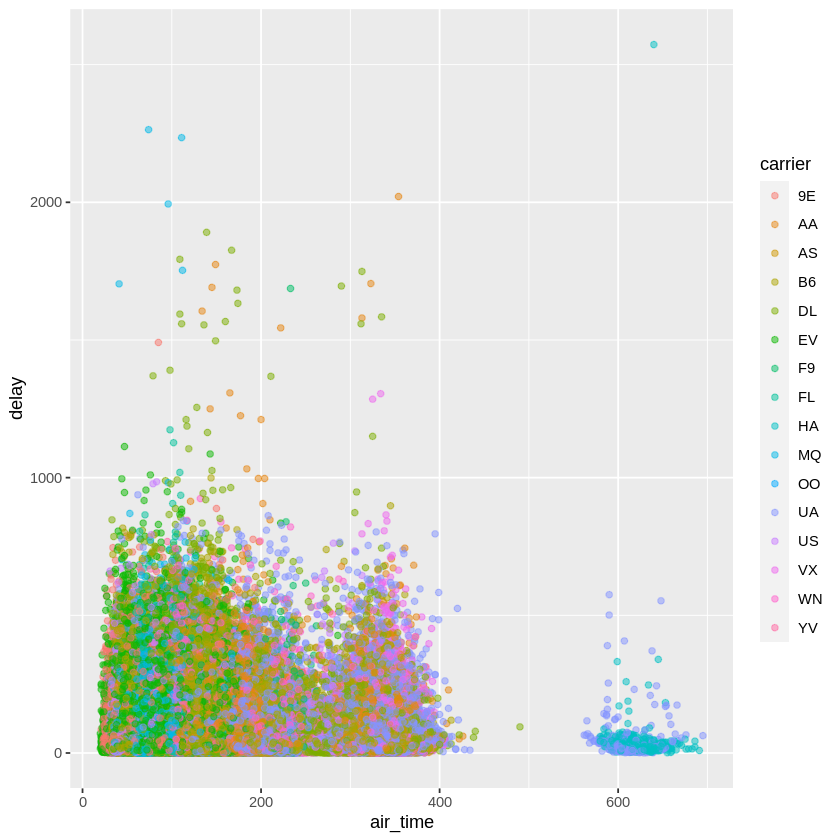

In [36]:
# 비행시간과 delay(이륙, 착륙 연착의 합)의 관계
# 항공사별 비행시간의 분포

flights %>%
  select(origin, dest, carrier, year, month, day, dep_time, distance, air_time, dep_delay, arr_delay) %>%
  mutate(delay = abs(dep_delay) + abs(arr_delay)) %>%

ggplot(aes(air_time, delay, color=carrier)) + geom_point(alpha=0.5)

Warning message:
“Removed 9430 rows containing missing values (geom_point).”


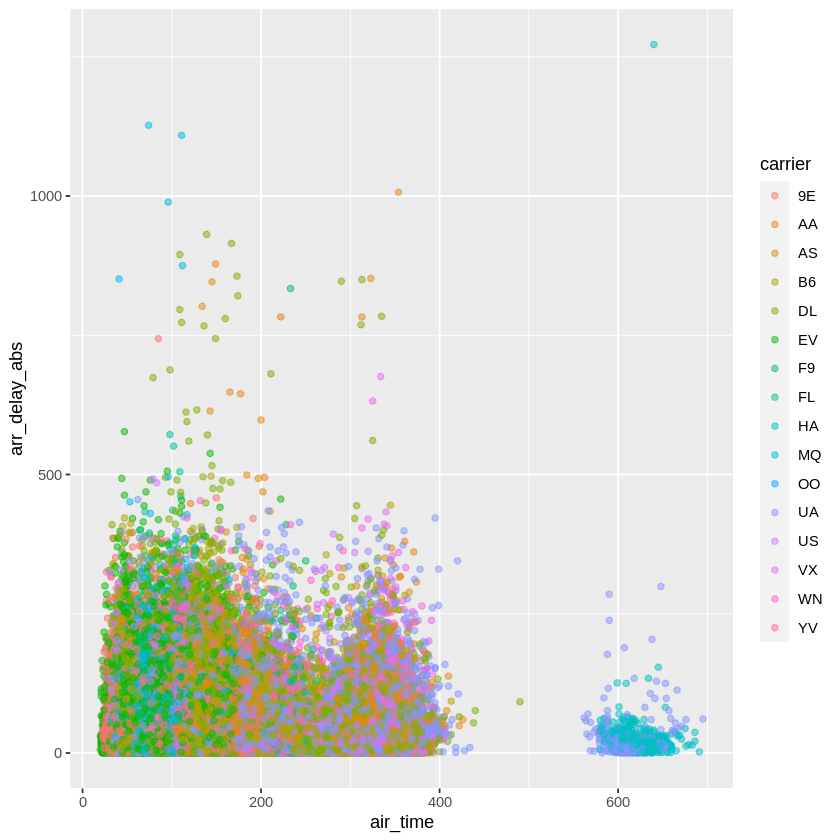

In [38]:
# 비행시간과 착륙 연착 시간의 관계
# 비행시간이 길어진다고 착륙의 연착이 발생할 가능성이 있어보이지 않음.

flights %>%
  select(origin, dest, carrier, year, month, day, dep_time, distance, air_time, dep_delay, arr_delay) %>%
  mutate(arr_delay_abs = abs(arr_delay)) %>%

ggplot(aes(air_time, arr_delay_abs, color=carrier)) + geom_point(alpha=0.5)
